In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
sns.set_theme()

In [17]:
data_dir = "/oak/stanford/groups/akundaje/atwang/gp_mouse_chrombpnet_results/assembly/mm10/scores_merged"
summary_path = os.path.join(data_dir, "summary_u.tsv")
data_path = os.path.join(data_dir, "data_u.tsv")



# Summary Visualizations

Here, I visualize some summary statistics for each cell type across tested mouse peaks

In [18]:
summary = pd.read_csv(summary_path, sep='\t', header=0)
summary


,label,fdr10,fdr1,fdr10_n,fdr1_n,npeaks,coverage
0,mCM-1-2,0.223236,0.0,0.166024,0.0,120272,4.903940
1,pCM-1,0.172602,0.0,0.089002,0.0,133266,5.604095
2,FB-3,0.160477,0.0,0.083279,0.0,109667,4.832013
3,EC-1,0.726300,0.0,0.593569,0.0,80486,4.382432
4,FB-CM,0.749011,0.0,0.373306,0.0,64194,3.948784
5,Other-1,0.000000,0.0,0.000000,0.0,166560,6.027319
6,dCM-2,0.000000,0.0,0.000000,0.0,147091,5.253095
7,mCM-1-3,0.000000,0.0,0.000000,0.0,64354,4.166558
8,Macro,0.000000,0.0,0.000000,0.0,106692,4.838299
9,FB-1,0.420821,0.0,0.428092,0.0,154586,5.544055


## Proportion of significant peaks for each cell type

The proportion of significant peaks in each cell type, at an FDR threshold of 10% and 1%. It looks like this proportion varies substantially across cell types for both thresholds. 

This could indicate cell-type-specific effects, but we want to account for possible confounders.

<AxesSubplot: xlabel='fdr10', ylabel='label'>

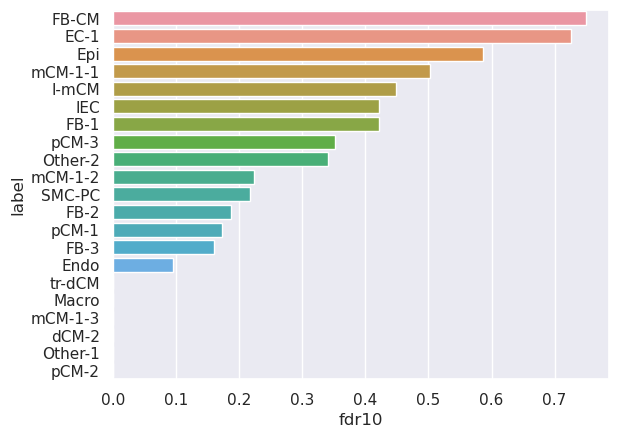

In [19]:
sns.barplot(data=summary, y="label", x="fdr10", order=summary.sort_values('fdr10', ascending=False).label)


<AxesSubplot: xlabel='fdr1', ylabel='label'>

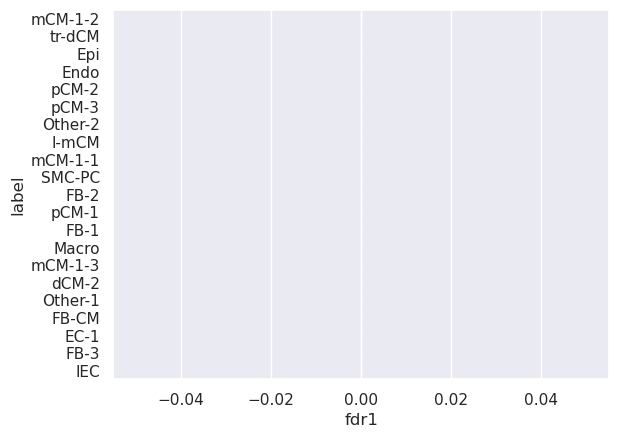

In [20]:
sns.barplot(data=summary, y="label", x="fdr1", order=summary.sort_values('fdr1', ascending=False).label)


## Significance vs. coverage

One potential confounder is varying read depths across cell types, which could impact model performance. 

Here, I plot the mean peak coverage (defined as log1p counts per peak) along with the proportion of significant peaks. They do not look correlated which indicates that the results are not confounded by coverage

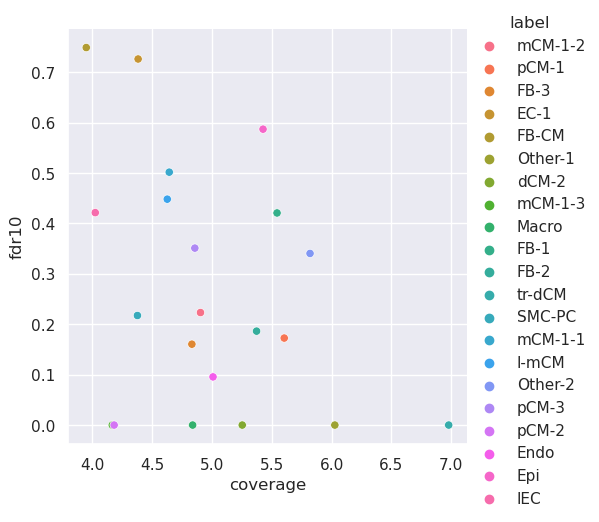

In [21]:
sns.relplot(data=summary, x="coverage", y="fdr10", hue="label")


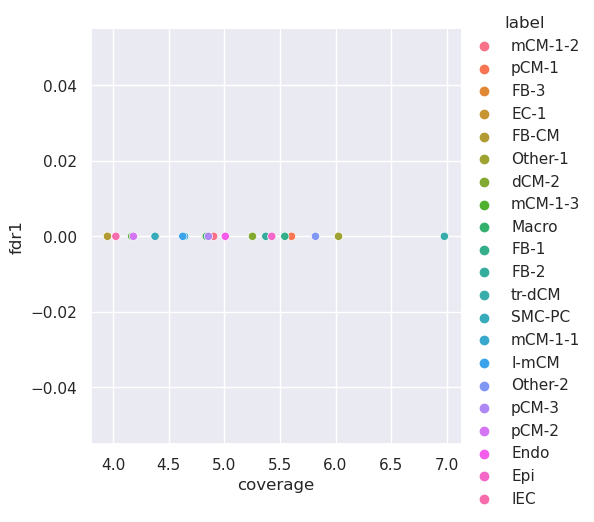

In [22]:
sns.relplot(data=summary, x="coverage", y="fdr1", hue="label")


## Significance vs. peak counts

Another potential confounder is the variable number of total peaks, since peak calling was done independently on each cell type. 

I plot the number of peaks along with the proportion of significant peaks. They do not look correlated either.

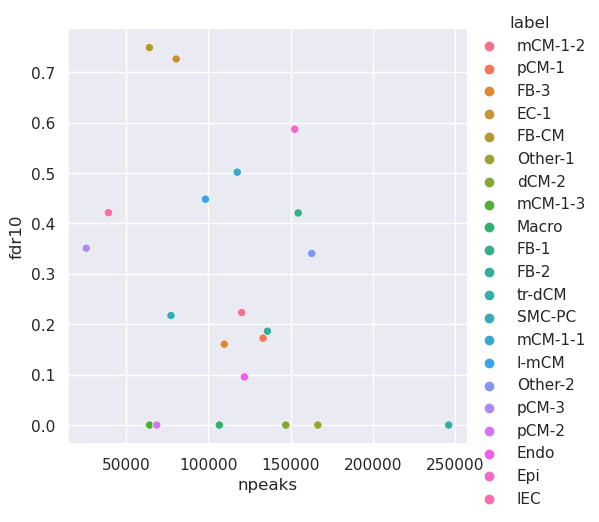

In [23]:
sns.relplot(data=summary, x="npeaks", y="fdr10", hue="label")


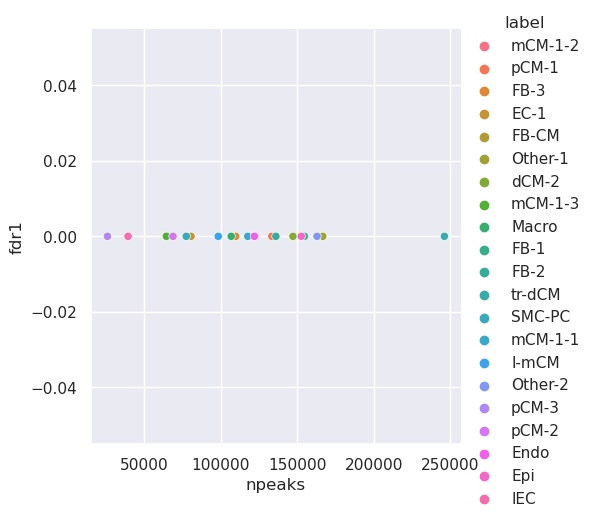

In [24]:
sns.relplot(data=summary, x="npeaks", y="fdr1", hue="label")


# Per-Peak Visualizations

Now, I look into the distributions of several metrics across individual mouse peaks.

In [25]:

data = pd.read_csv(data_path, sep='\t', header=0)
data

,chrom,summit_pos,fold_0_ss,fold_1_ss,fold_0_xs,fold_1_xs,ss_mean,xs_mean,ss_std,xs_std,...,u_stat_ss,u_stat_xs,-log10p,-log10q,u_stat_ss_qn,u_stat_xs_qn,-log10p_qn,-log10q_qn,log1p_true_counts,Label
0,chr16,29881724,0.433666,-0.196751,-0.309023,-0.332032,0.079500,-0.400848,0.271342,0.101156,...,25.0,0.0,2.100371,1.308075,25.0,0.0,2.100371,1.154415,5.758902,mCM-1-2
1,chr8,34424820,-1.061898,-1.241448,-0.446263,-0.377660,-1.083228,-0.658344,0.106679,0.243441,...,0.0,25.0,2.100371,1.308075,5.0,20.0,0.821617,0.474208,3.555348,mCM-1-2
2,chr8,34145648,1.321063,1.337857,1.091955,1.119932,1.428153,0.943709,0.125765,0.154603,...,25.0,0.0,2.100371,1.308075,23.0,2.0,1.498311,0.862050,6.154858,mCM-1-2
3,chr15,76476604,2.037350,2.051272,1.552815,1.433378,1.976994,1.503232,0.080648,0.073632,...,25.0,0.0,2.100371,1.308075,25.0,0.0,2.100371,1.154415,6.839476,mCM-1-2
4,chr15,76476308,2.296358,2.500683,1.770770,1.708491,2.287241,1.719160,0.158370,0.059054,...,25.0,0.0,2.100371,1.308075,25.0,0.0,2.100371,1.154415,6.858565,mCM-1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393287,chr19,40872427,0.680662,1.003832,0.751812,0.473544,0.799631,0.734483,0.134998,0.153843,...,13.0,12.0,-0.000000,-0.000000,15.0,10.0,0.160851,0.112633,4.043051,lEC
2393288,chr9,72132166,0.323547,0.136900,0.091553,0.237227,0.258670,0.258455,0.074979,0.104970,...,12.0,13.0,-0.000000,-0.000000,10.0,15.0,0.160851,0.112633,5.062595,lEC
2393289,chr11,78559514,-1.300482,-1.032522,-1.153270,-1.380844,-1.107213,-1.104139,0.115691,0.178750,...,12.0,13.0,-0.000000,-0.000000,9.0,16.0,0.261521,0.186074,2.397895,lEC
2393290,chr4,155480473,0.276678,0.539596,0.571142,0.301397,0.456441,0.408787,0.172610,0.270252,...,12.0,13.0,-0.000000,-0.000000,13.0,12.0,-0.000000,-0.000000,3.931826,lEC


## Mean vs Variance per peak

Here, we look at the means and variances of divergence between species for each mouse peak.  

The x axis for each subplot is the difference of the predicted log10 counts from the GP models and the mouse models, averaged over 5 folds. A positive value indicates a greater prediction from the GP models relative to the mouse models.

The y axis is the estimated standard deviation across folds of the divergence between the two species' count outputs. A higher standard deviation indicates higher variances across folds.    
The color indicates the significance of the difference between species for each peak, as evaluated using the Mann-Whitney U test. I also looked into using DESeq also but I its assumptions are geared towards observed counts from experimental data and aren't really appropiate for analyzing predicted counts from models (more below).

Here, we see basically no correlation between mean and variance, which directly contradicts with the assumptions made by DESeq. The exceptions are mCM-1-3, Other-2, and pCM-3, though these seem to be due to technical issues (more later).

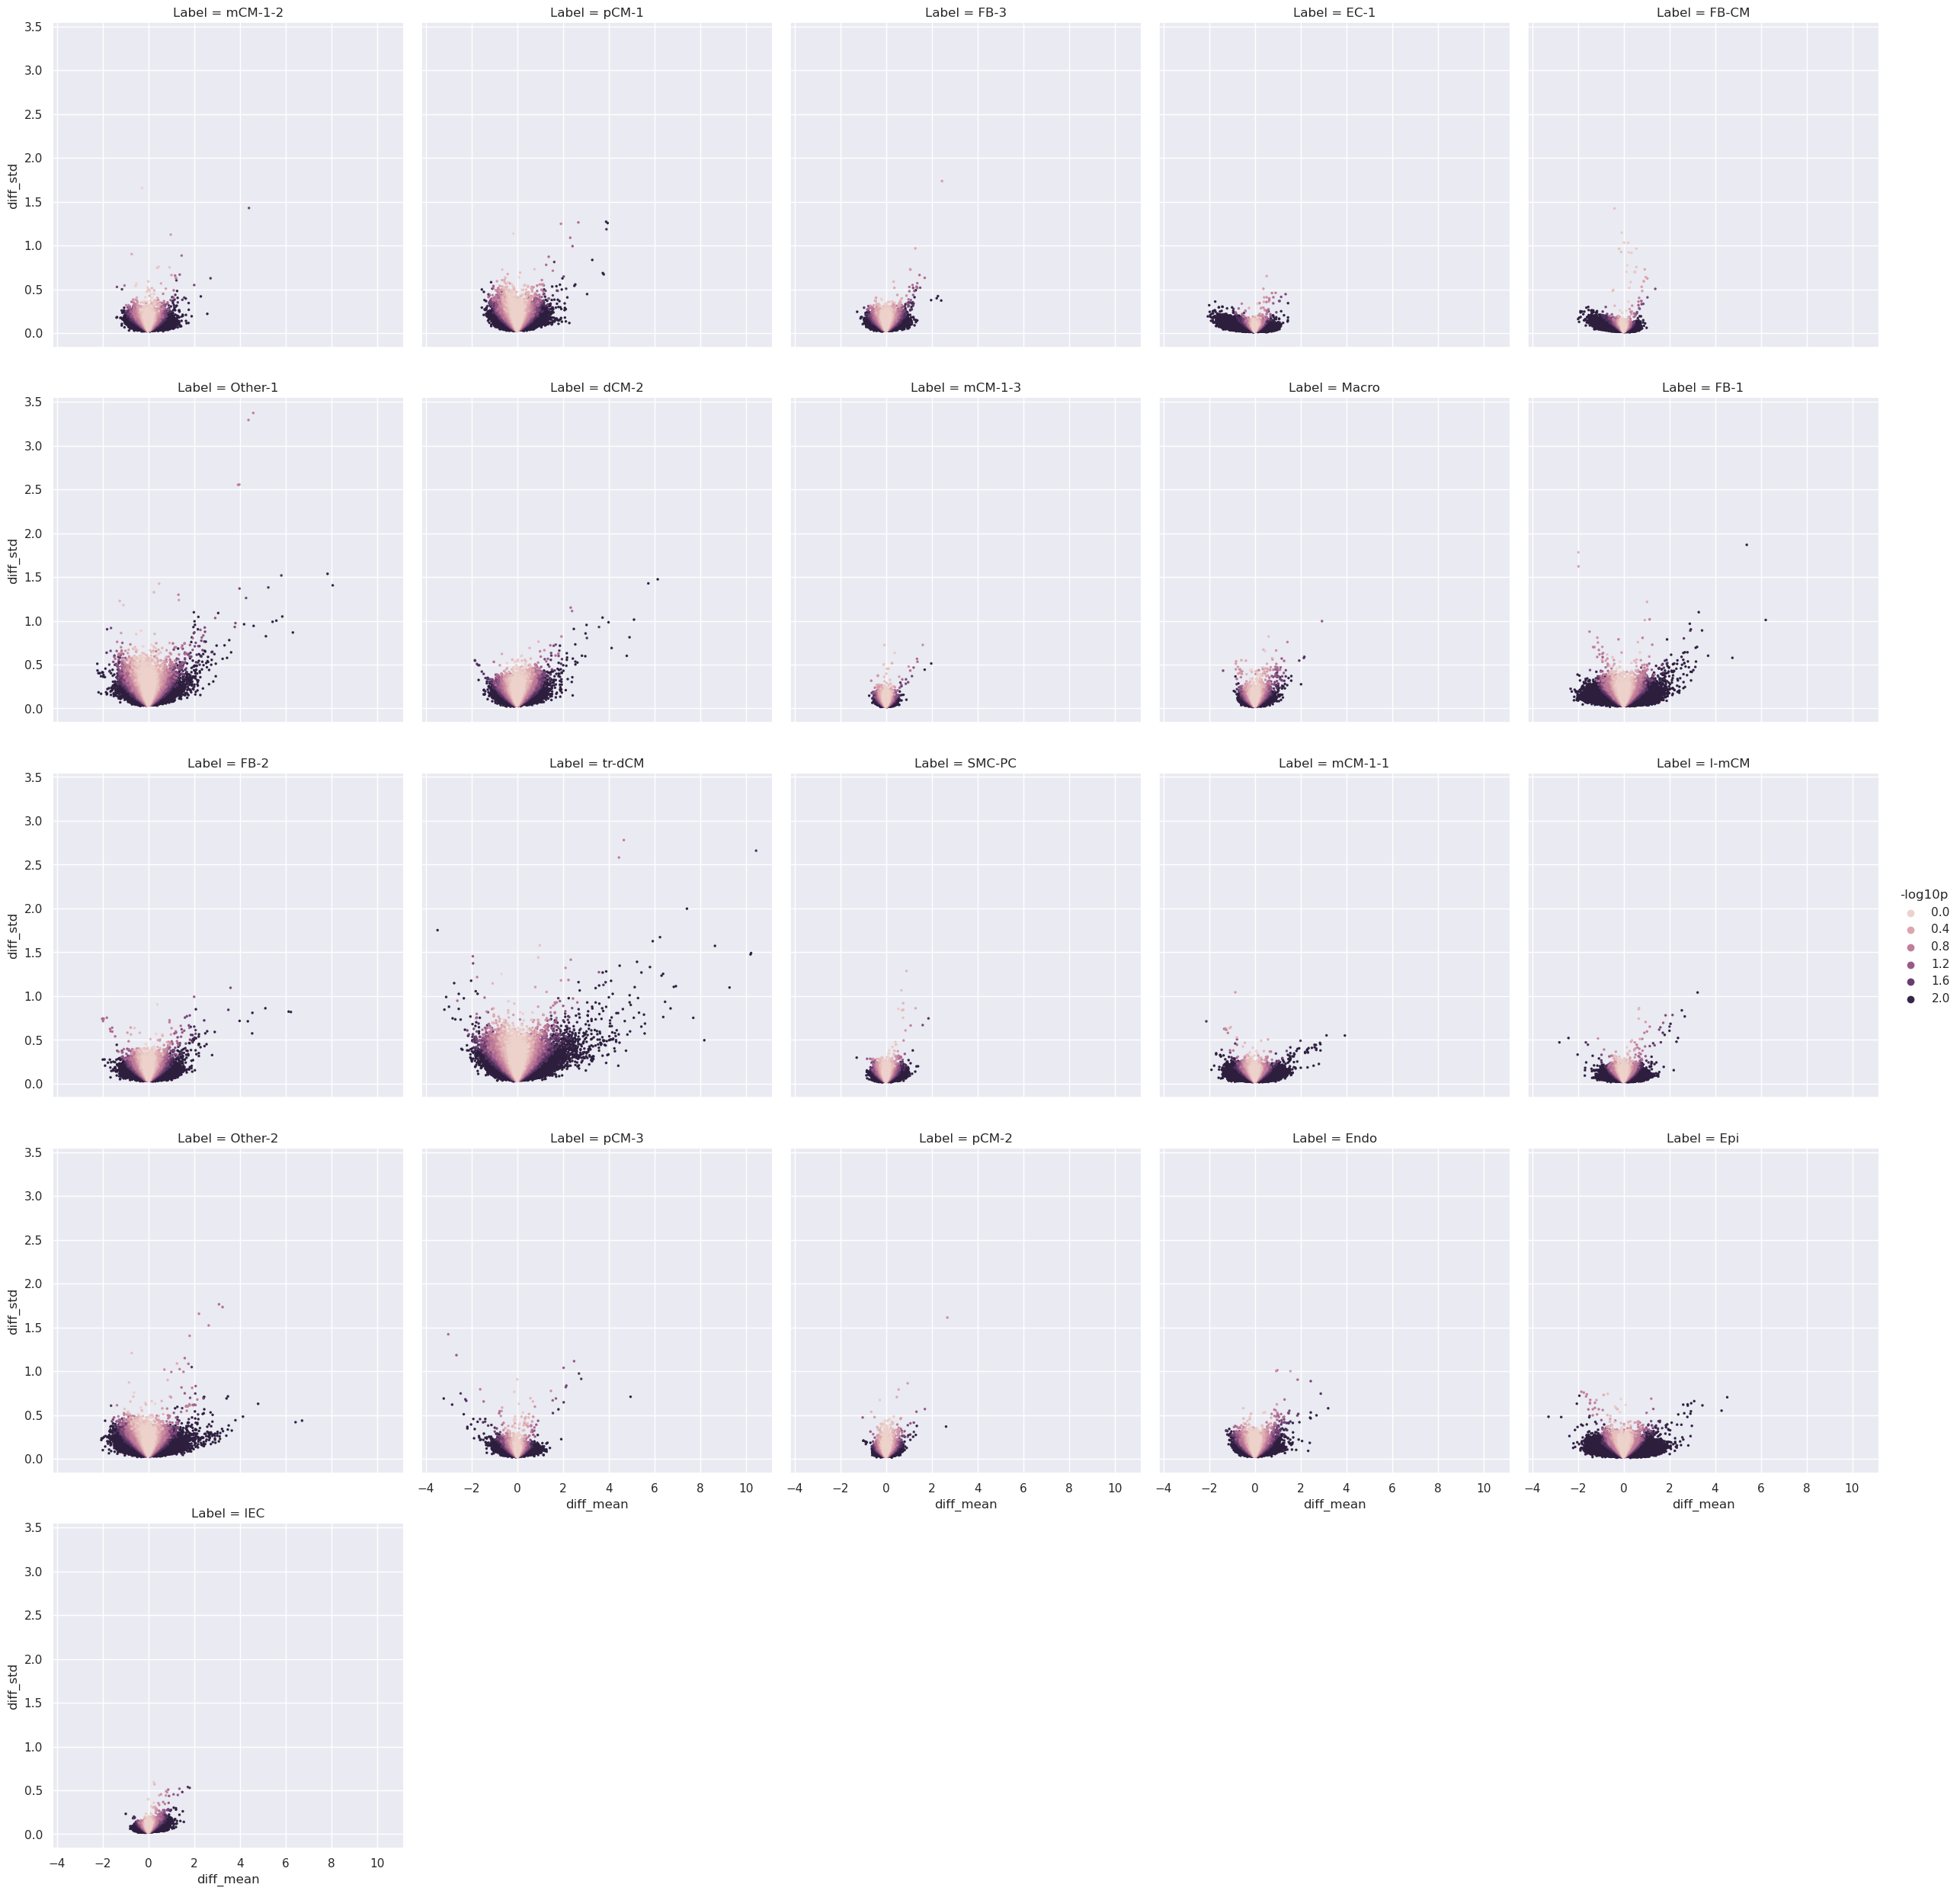

In [26]:
sns.relplot(data=data, x="diff_mean", y="diff_std", hue="-log10p", col="Label", col_wrap=5, s=5, edgecolor=None)


## Mouse vs. GP predictions

Next, we look at the mean predictions of the mouse and GP models on the mouse peaks.  

The x axis is the mean predicted log10 counts as predicted by the mouse models, averaged across 5 folds. The y axis is the mean predicted log10 counts as predicted by the GP models.

And as before, the color indicates the significance of the difference between species.

Note that within each species and each cell types, the predicted log counts are zero-centered across peaks to account for read depth differences across species. Thus, the intercept in the plots are always zero. 

For most cell types, the relationship between the axes is linear with a slope of 1. 

However, for mCM-1-3, Other-2, and pCM-3, the slope is significantly different than 1, which skews the statistics. It is unclear whether this phenomenon is an artifact of training or represents real biology. 

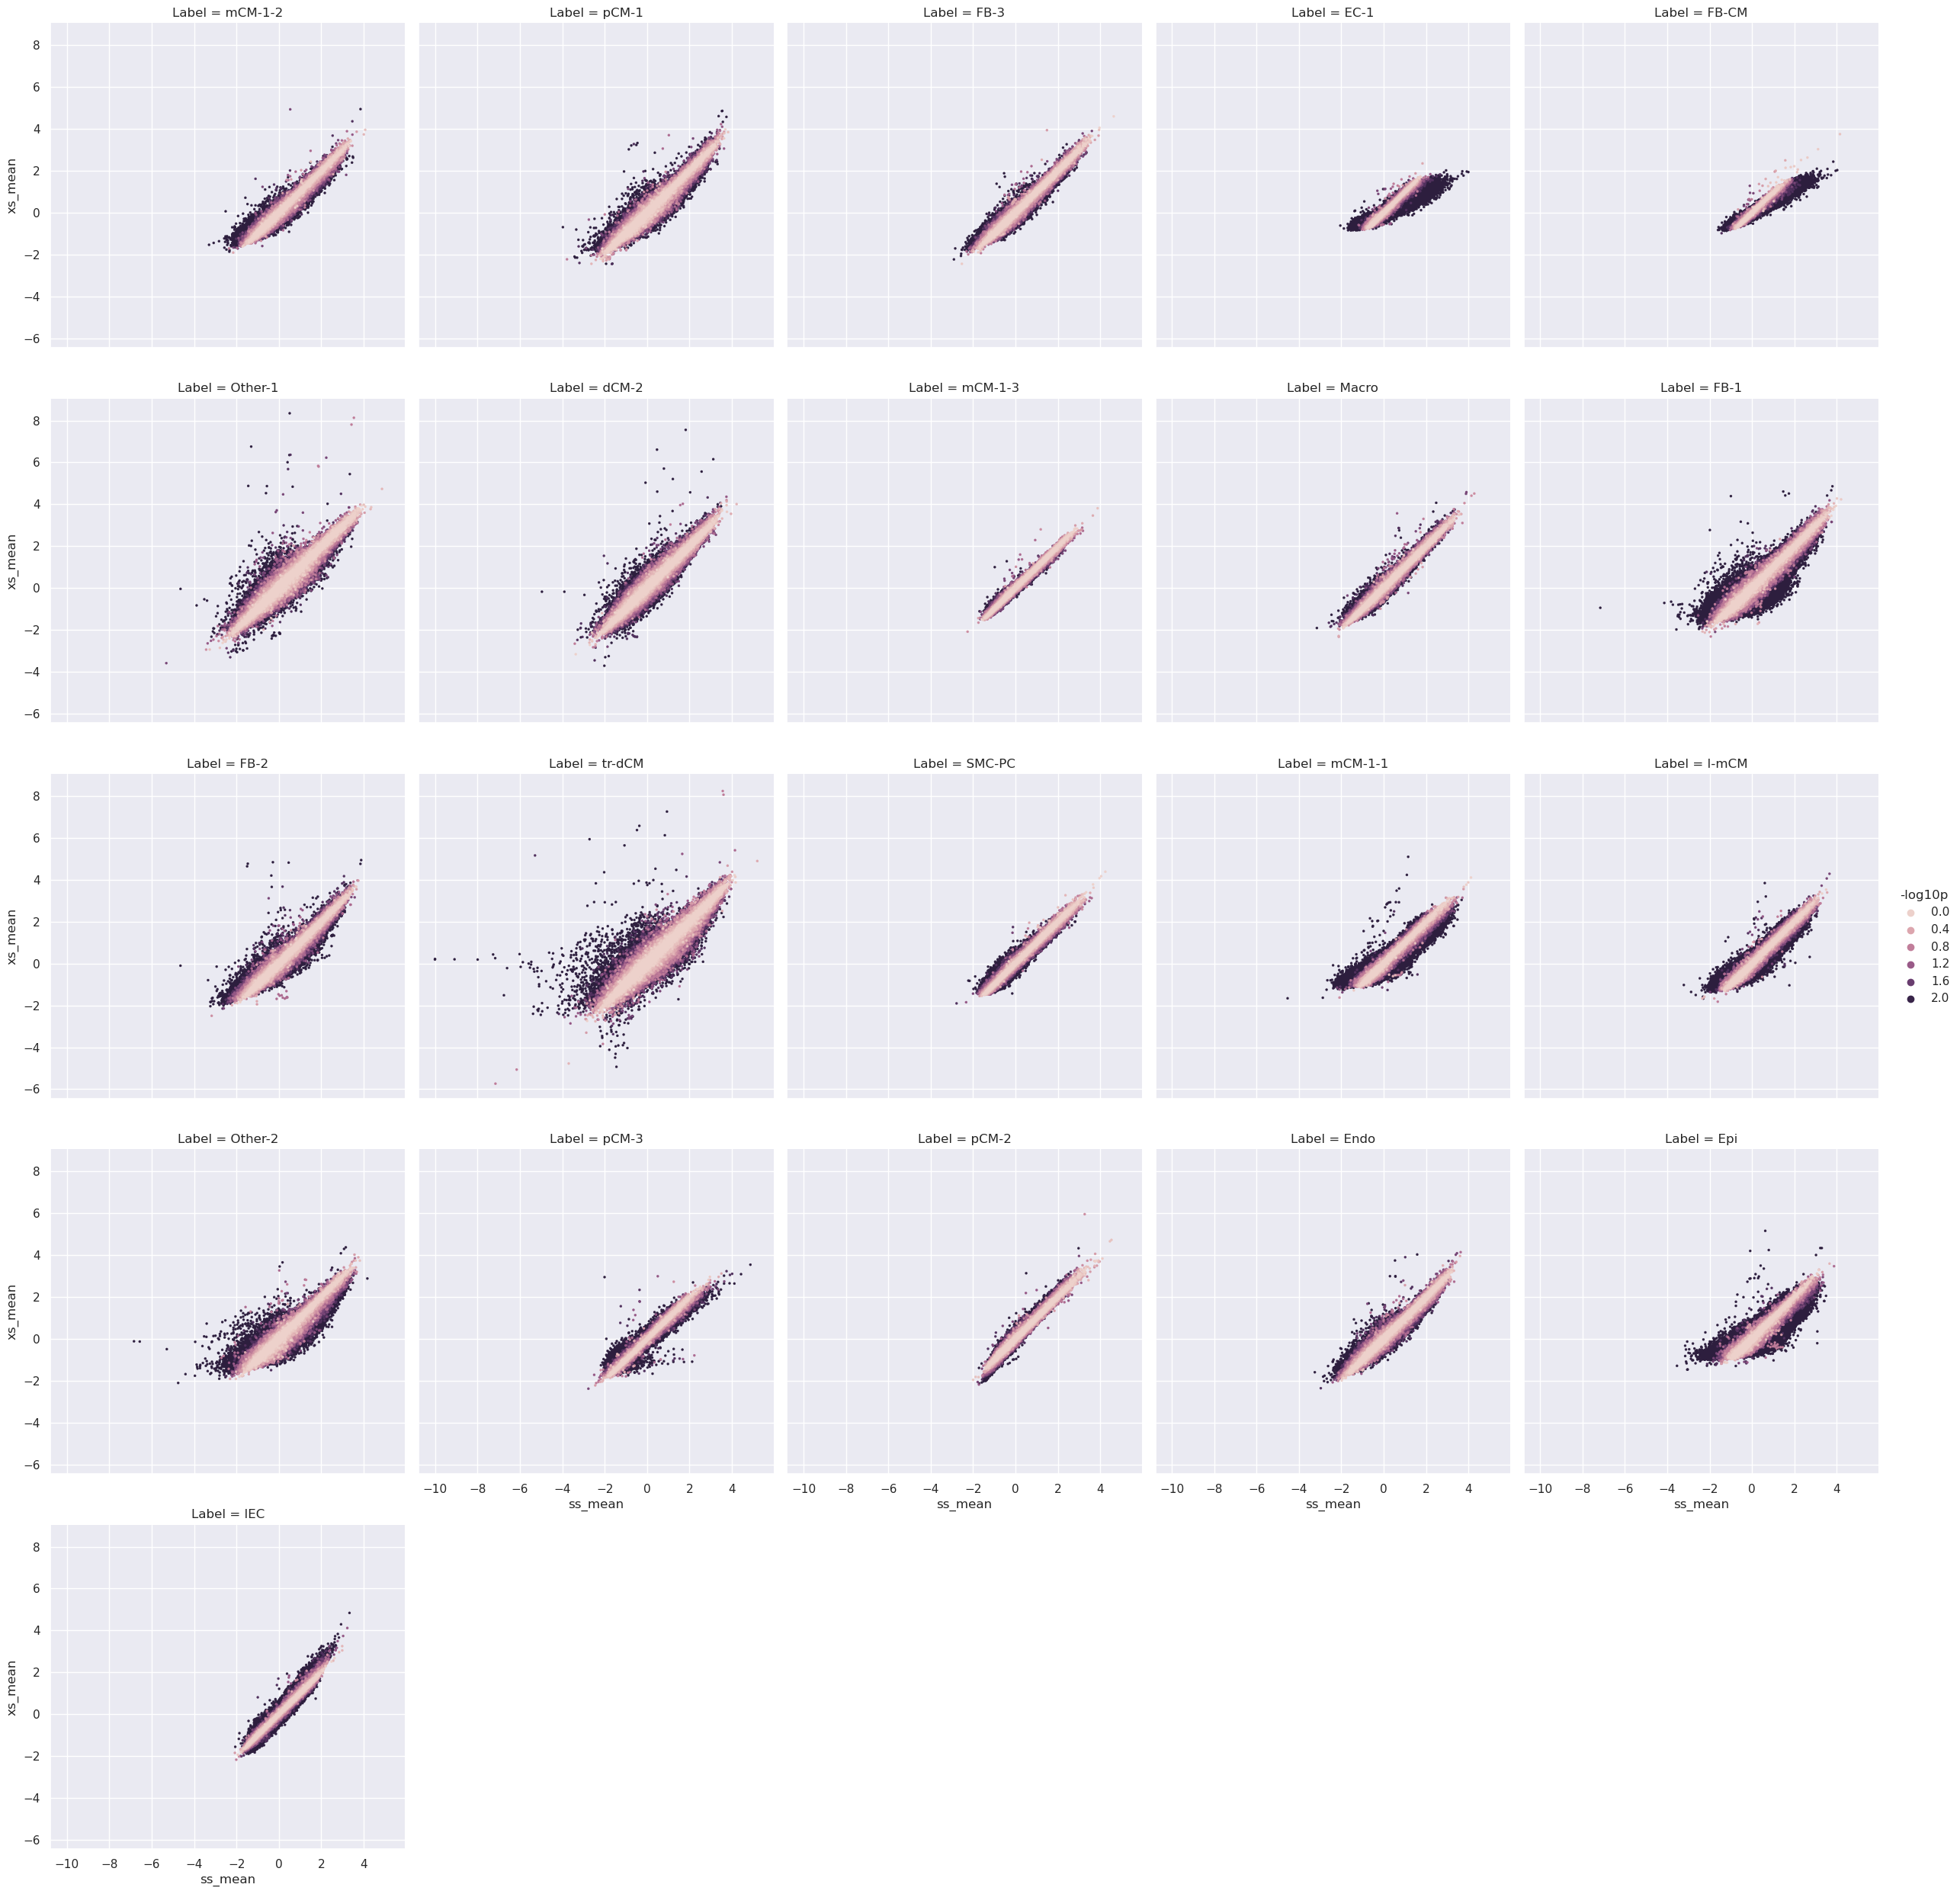

In [27]:
sns.relplot(data=data, x="ss_mean", y="xs_mean", hue="-log10p", col="Label", col_wrap=5, s=5, edgecolor=None)


## Predicted vs. True counts

We look a the fold 0 mouse model predictions compared the true counts on mouse peaks.  

The x axis is the predicted log10 counts as predicted by the mouse model. The y axis is the log1p true counts for the same peaks. Note that these values are on different scales but they are linearly related.

And as before, the color indicates the significance of the difference between species.

There seems to be an enrichment of significant peaks in inputs with low model predictive accuracy. This indicates potential false positives we should watch out for. 

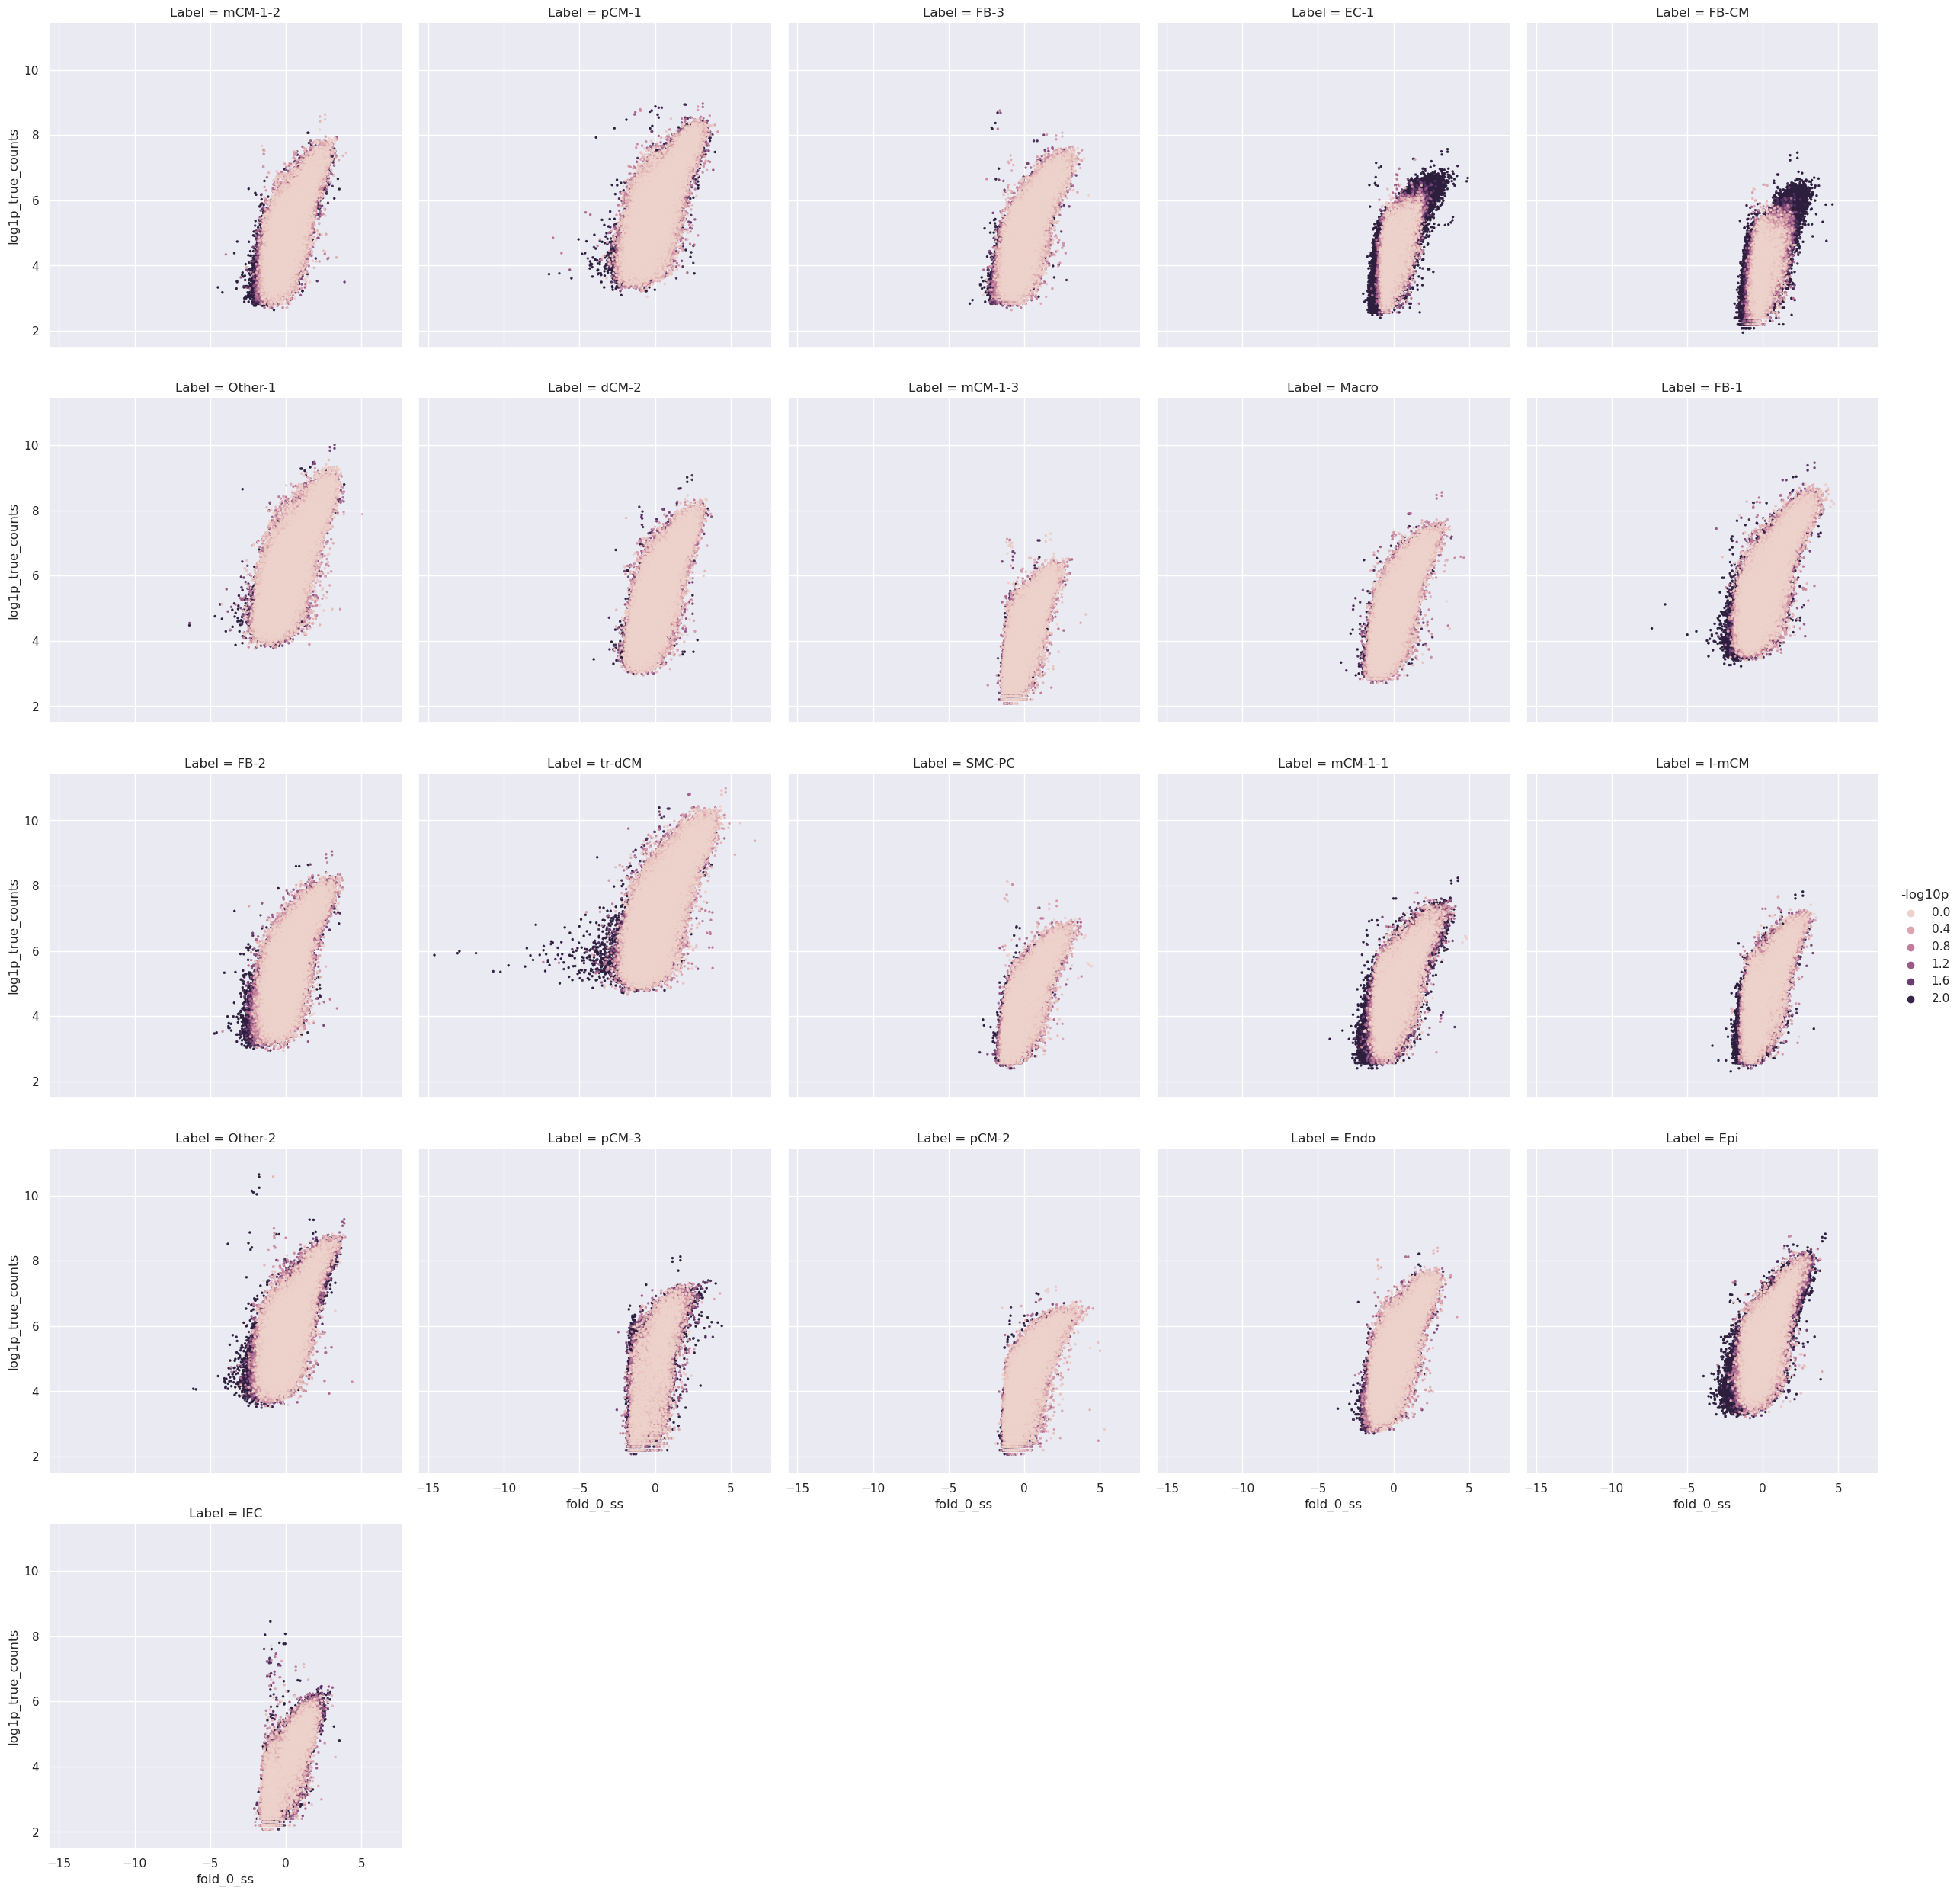

In [28]:
sns.relplot(data=data, x="fold_0_ss", y="log1p_true_counts", hue="-log10p", col="Label", col_wrap=5, s=5, edgecolor=None)


## Predicted vs. predicted counts

We look a the fold 0 mouse model predictions compared the fold 1 mouse model predictions.  

The x axis is the predicted log10 counts as predicted by the fold 0 mouse model. The y axis is the predicted log10 counts as predicted by the fold 1 mouse model.

And as before, the color indicates the significance of the difference between species.

There seems to be an enrichment of significant peaks in inputs with low model predictive accuracy. This indicates potential false positives we should watch out for. 

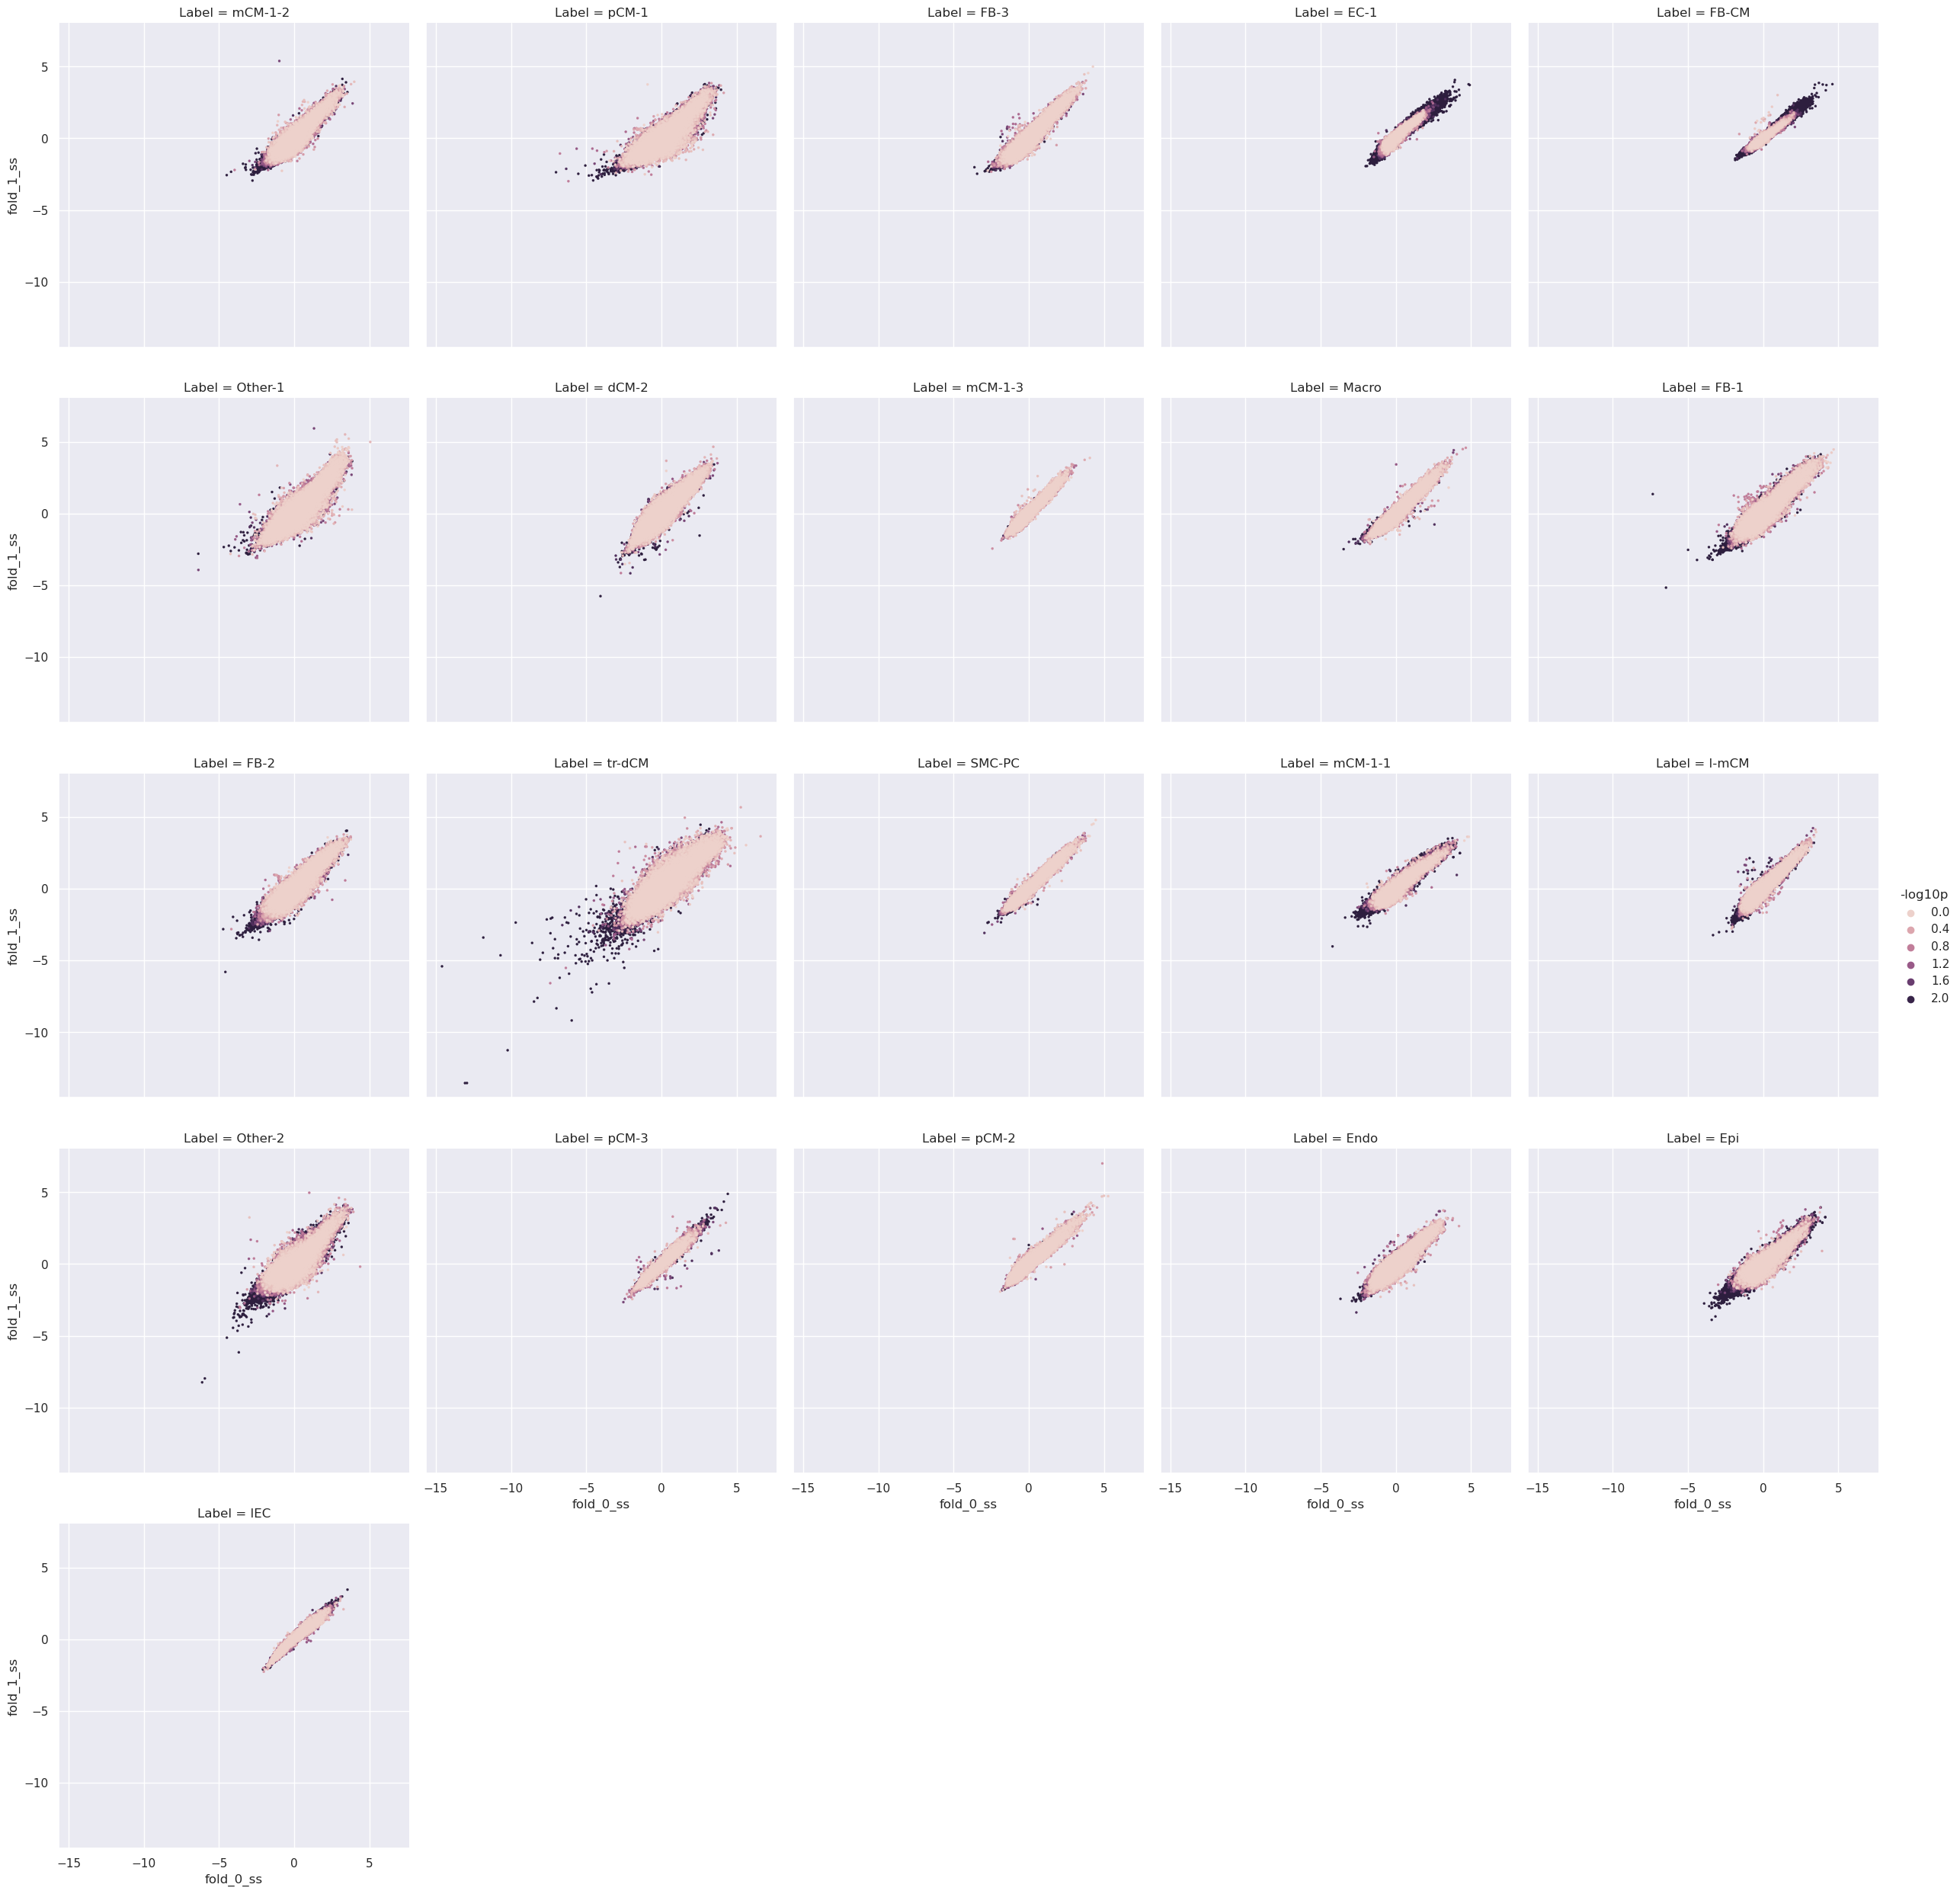

In [29]:
sns.relplot(data=data, x="fold_0_ss", y="fold_1_ss", hue="-log10p", col="Label", col_wrap=5, s=5, edgecolor=None)


## Predicted vs. cross-species predicted counts

We look a the fold 0 mouse model predictions compared the fold 0 GP model predictions.  

The x axis is the predicted log10 counts as predicted by the fold 0 mouse model. The y axis is the predicted log10 counts as predicted by the fold 0 GP model.

And as before, the color indicates the significance of the difference between species.

There seems to be an enrichment of significant peaks in inputs with low model predictive accuracy. This indicates potential false positives we should watch out for. 

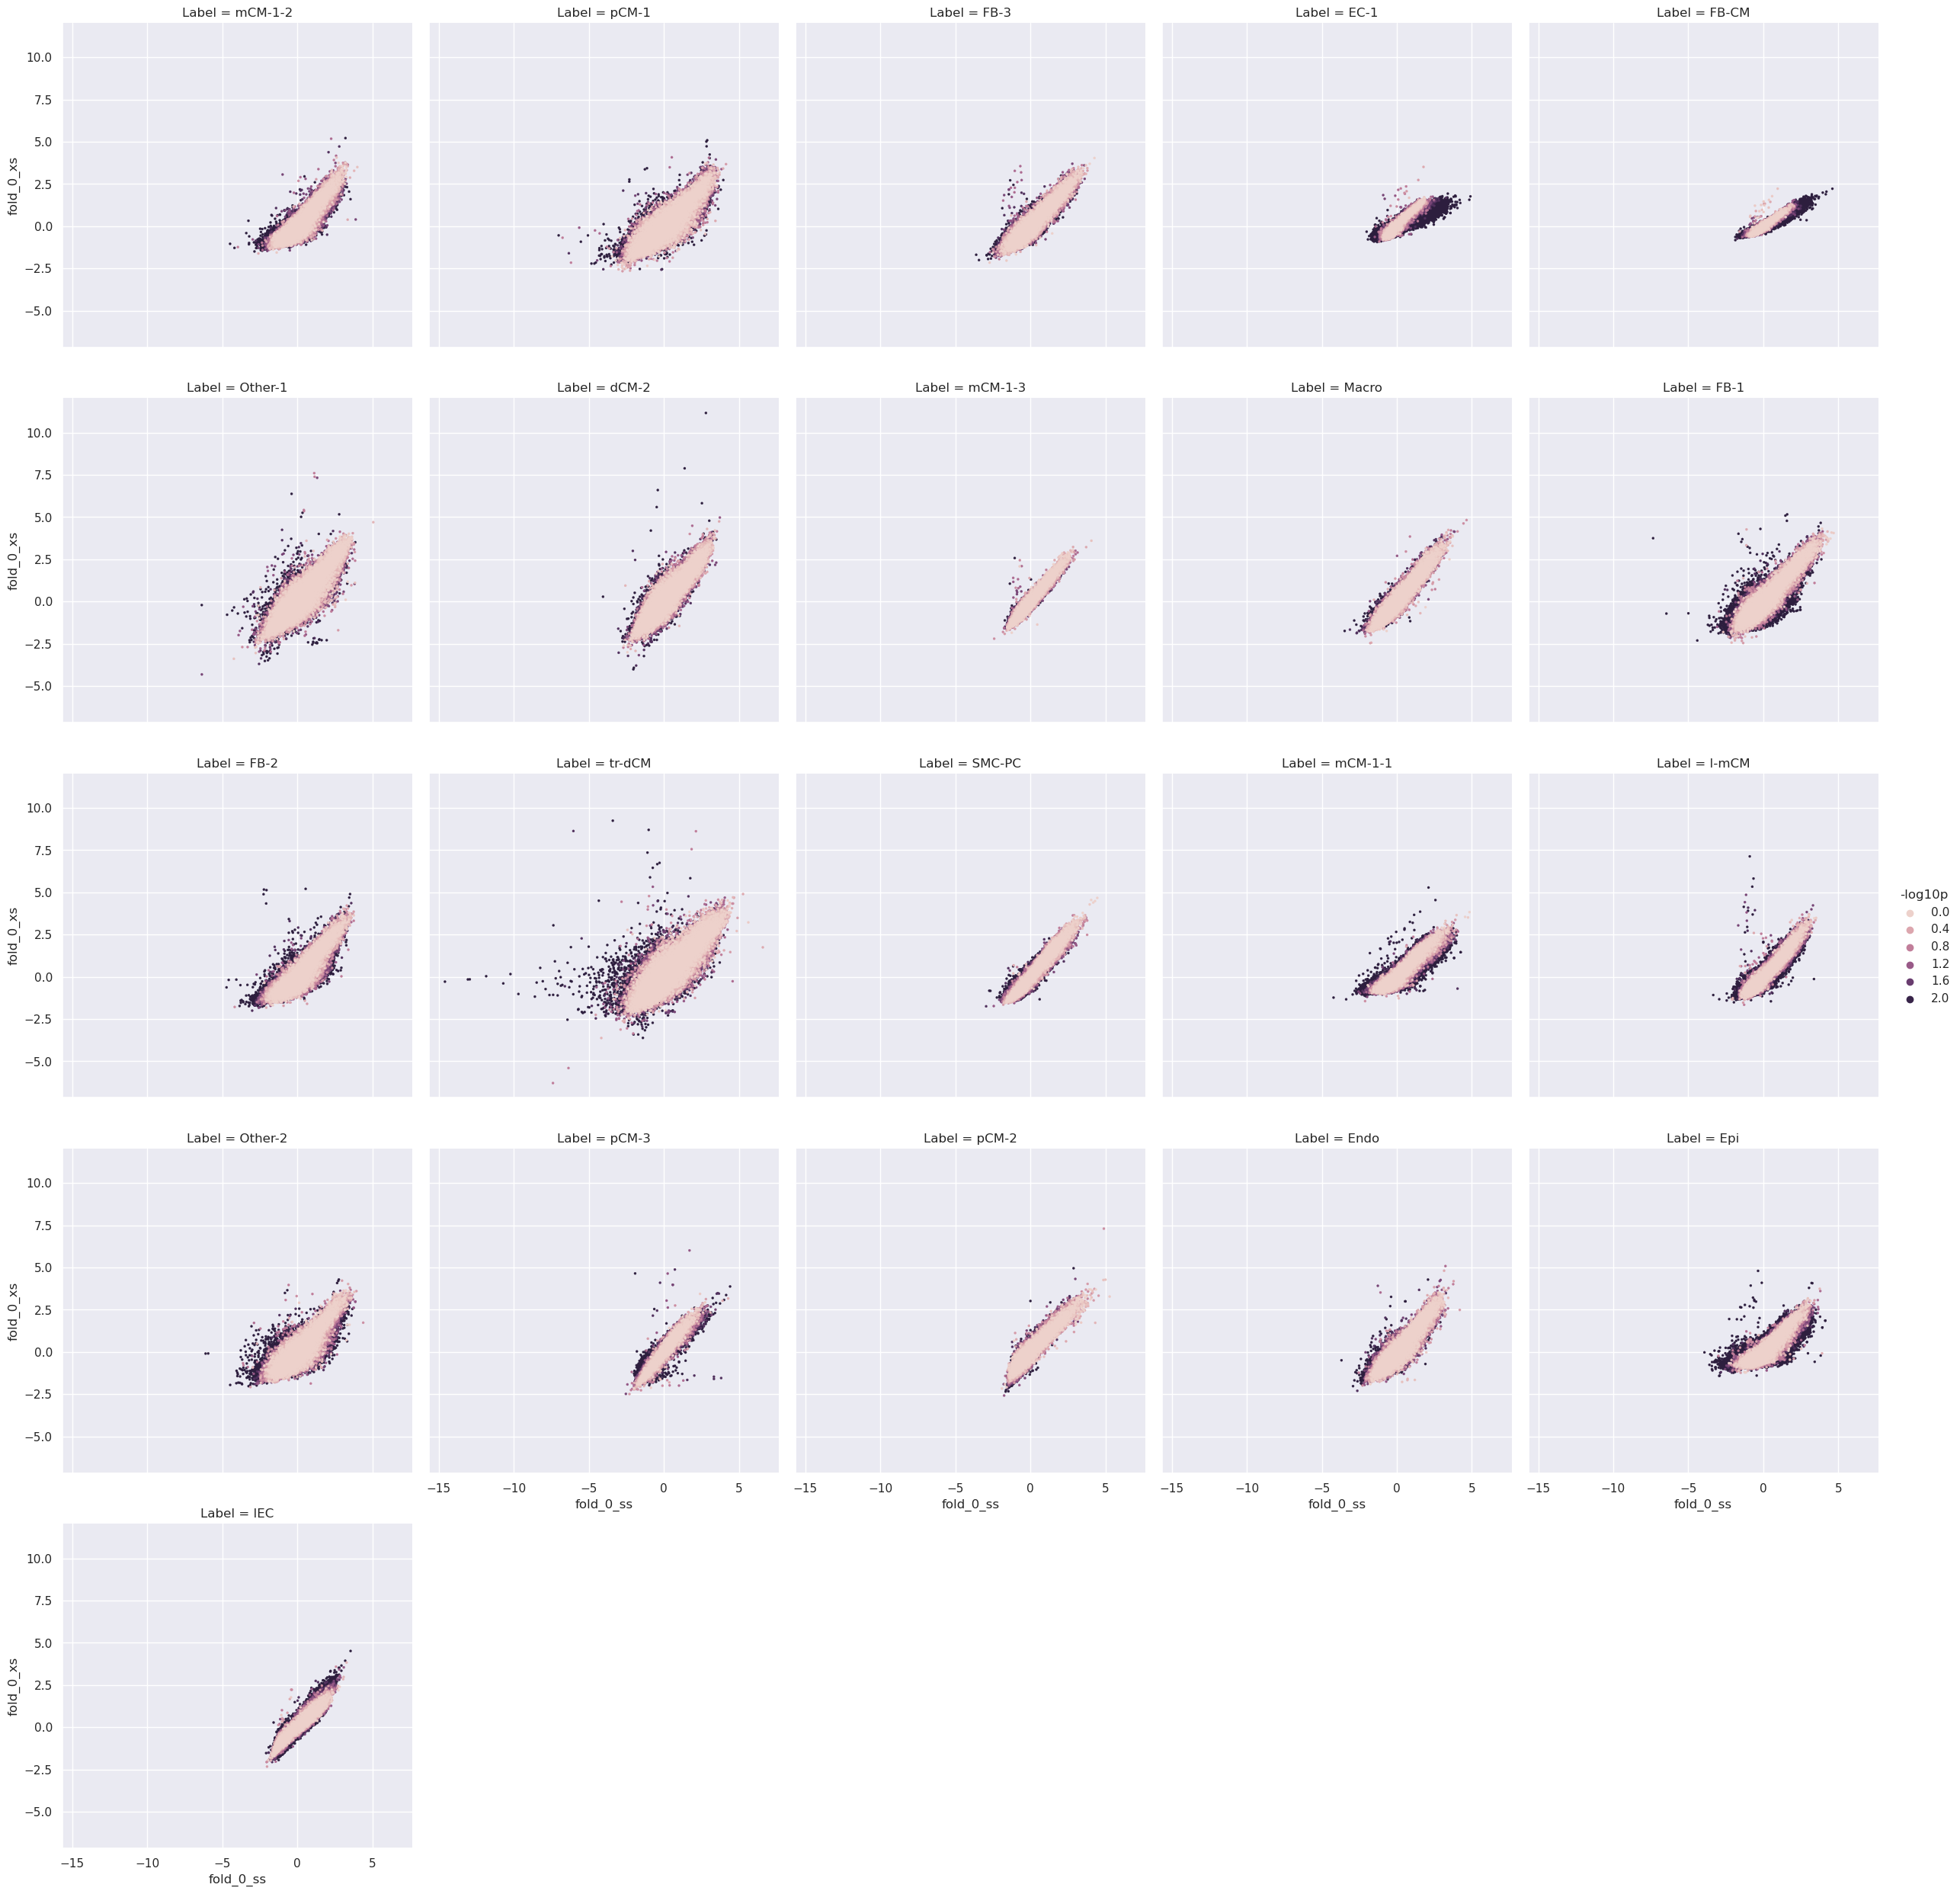

In [30]:
sns.relplot(data=data, x="fold_0_ss", y="fold_0_xs", hue="-log10p", col="Label", col_wrap=5, s=5, edgecolor=None)


## Quantitative cross-species prediction performance

Lastly, we look at the predictive cross_species performance for each cell type using spearman correlation across peaks.

SpearmanSame is the correlation of predicted counts from two folds of mouse model. This serves as an upper bound of cross-species predictive performance

SpearmanCross is the correlation of predicted counts from a mouse model with the predicted counts from the corresponding GP model. 

SpearmanObserved is the correlation of observed counts from a mouse model with true observed mouse counts.

We see that SpearmanCross is substantially closer to SpearmanSame than to SpearmanObserved, indicating that the predicted counts between two species correspond much more strongly than the predicted vs. true counts in the same species

In [42]:
from scipy import stats

grouped = data.groupby("Label")
header = ["Label", "SpearmanSame", "SpearmanCross", "SpearmanObserved"]
records = []
for name, group in grouped:
    fold_0_ss = group[['fold_0_ss']].to_numpy()
    fold_1_ss = group[['fold_1_ss']].to_numpy()
    fold_0_xs = group[['fold_0_xs']].to_numpy()
    observed = group[['log1p_true_counts']].to_numpy()
    corr_ss = stats.spearmanr(fold_0_ss, fold_1_ss).correlation
    corr_xs = stats.spearmanr(fold_0_ss, fold_0_xs).correlation
    corr_observed = stats.spearmanr(fold_0_ss, observed).correlation
    records.append([name, corr_ss, corr_xs, corr_observed])
    
corrs = pd.DataFrame.from_records(records, columns=header)
corrs

,Label,SpearmanSame,SpearmanCross,SpearmanObserved
0,EC-1,0.968737,0.894602,0.775375
1,Endo,0.936644,0.903886,0.760001
2,Epi,0.918985,0.773677,0.753890
3,FB-1,0.919469,0.801479,0.740185
4,FB-2,0.918391,0.850169,0.741325
5,FB-3,0.944926,0.898325,0.745962
6,FB-CM,0.978523,0.947679,0.758052
7,Macro,0.954833,0.924396,0.733878
8,Other-1,0.903053,0.858259,0.755894
9,Other-2,0.896569,0.841672,0.770978
